Antes de comenzar es necesario importar las librerías que nos van a hacer falta.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.linear_model.logistic import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import chi2 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Web scrapping
import requests
from bs4 import BeautifulSoup

# Fecha
from datetime import datetime, timedelta
from pandas import DataFrame

#Balanceo
from imblearn.over_sampling import SMOTE

## 1. Cargamos los ficheros

Cargamos los ficheros de enero y de diciembre y les mergeamos respectivamente en dos dataframes.

**DICIEMBRE**

In [2]:
# DICIEMBRE
df_clientes=pd.read_csv('clientes_diciembre.csv', sep='|')
df_consumos=pd.read_csv('consumos_diciembre.csv', sep='|')
df_finan=pd.read_csv('financiacion_diciembre.csv', sep='|')
df_prod=pd.read_csv('productos_diciembre.csv', sep='|')

In [3]:
df_clientes.shape

(95467, 8)

In [4]:
df_consumos.shape

(95467, 6)

In [5]:
df_finan.shape

(24198, 4)

In [6]:
df_prod.shape

(95467, 4)

Vemos que clientes, consumos y productos tienen el mismo número de filas por lo que podemos mergearles. En cuanto a financiación, primero comprobamos que los id están incluídos dentro de clientes o de cualquiera de los otros dos.

In [7]:
sum(df_finan['id'].isin(df_clientes['id']))

24198

Acabamos de comprobar que coincide, por tanto podemos pasar a mergearlos. 

In [8]:
# Mergeamos
diciembre = pd.merge(df_clientes,df_consumos, on='id', how = 'left' )
diciembre = pd.merge(diciembre,df_finan, on='id', how = 'left' )

In [9]:
diciembre = pd.merge(diciembre,df_prod, on='id', how = 'left' )
diciembre.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,NaN,NaN,110,79,10897,12806,13751,NaN,NaN,NaN,FIBRA,50MB,tv-futbol
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,NaN,NaN,189,89,18657,6499,10862,NaN,NaN,SI,FIBRA,600MB,tv-futbol
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,NaN,NaN,129,30,15511,17013,16743,NaN,NaN,SI,ADSL,35MB,tv-futbol
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,NaN,NaN,51,52,12670,3393,6771,NaN,NaN,NaN,FIBRA,200MB,tv-familiar
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NaN,183,3,23756,18436,4485,NaN,NaN,NaN,ADSL,10MB,tv-futbol


**ENERO**

In [10]:
# Enero
df_clientes_en=pd.read_csv('clientes_enero.csv', sep='|')
df_consumos_en=pd.read_csv('consumos_enero.csv', sep='|')
df_finan_en=pd.read_csv('financiacion_enero.csv', sep='|')
df_prod_en=pd.read_csv('productos_enero.csv', sep='|')

In [11]:
df_clientes_en.shape

(92711, 8)

In [12]:
df_consumos_en.shape

(92711, 6)

In [13]:
df_finan_en.shape

(25332, 4)

In [14]:
df_prod_en.shape

(92711, 4)

In [15]:
sum(df_finan_en['id'].isin(df_clientes_en['id']))

25332

Como vemos, podemos mergear porque ocurre lo mismo que en diciembre.

In [16]:
# Mergeamos
enero = pd.merge(df_clientes_en,df_consumos_en, on='id', how = 'left' )
enero = pd.merge(enero,df_finan_en, on='id', how = 'left' )

In [17]:
enero = pd.merge(enero,df_prod_en, on='id', how = 'left' )
enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,NaN,NaN,95,19,6525,7634,18520,NaN,NaN,NaN,FIBRA,50MB,tv-futbol
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,NaN,NaN,44,36,14471,14541,8016,NaN,NaN,SI,FIBRA,600MB,tv-futbol
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,NaN,NaN,94,27,1428,5248,7106,NaN,NaN,SI,ADSL,35MB,tv-futbol
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,NaN,NaN,186,20,20083,7372,5052,NaN,NaN,NaN,FIBRA,200MB,tv-familiar
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,NaN,NaN,37,32,19078,5009,8686,NaN,NaN,NaN,FIBRA,200MB,tv-futbol


--------------------------------------------------------------

## 2. Preprocesado y limpieza de datos

Vamos a imputar los NaN de num_dt, incidencia, financiacion, imp_financ y descuentos. Después de ello juntamos diciembre y enero.

In [18]:
diciembre.num_dt.fillna(0, inplace = True)
diciembre.incidencia.fillna('NO', inplace = True)
diciembre.financiacion.fillna('NO', inplace = True)
diciembre.imp_financ.fillna(0, inplace = True)
diciembre.descuentos.fillna('NO', inplace = True)
diciembre.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,0.0,NO,110,79,10897,12806,13751,NO,0.0,NO,FIBRA,50MB,tv-futbol
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,0.0,NO,189,89,18657,6499,10862,NO,0.0,SI,FIBRA,600MB,tv-futbol
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,0.0,NO,129,30,15511,17013,16743,NO,0.0,SI,ADSL,35MB,tv-futbol
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,0.0,NO,51,52,12670,3393,6771,NO,0.0,NO,FIBRA,200MB,tv-familiar
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NO,183,3,23756,18436,4485,NO,0.0,NO,ADSL,10MB,tv-futbol


In [19]:
enero.num_dt.fillna(0, inplace = True)
enero.incidencia.fillna('NO', inplace = True)
enero.financiacion.fillna('NO', inplace = True)
enero.imp_financ.fillna(0, inplace = True)
enero.descuentos.fillna('NO', inplace = True)
enero.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV
0,1,63,216.028109,11/23/2018 08:48 AM,La Rioja,5,0.0,NO,95,19,6525,7634,18520,NO,0.0,NO,FIBRA,50MB,tv-futbol
1,2,84,255.830842,08/22/2017 03:19 AM,Vizcaya,3,0.0,NO,44,36,14471,14541,8016,NO,0.0,SI,FIBRA,600MB,tv-futbol
2,3,66,135.768153,12/27/2001 01:50 PM,Albacete,4,0.0,NO,94,27,1428,5248,7106,NO,0.0,SI,ADSL,35MB,tv-futbol
3,4,69,255.658527,08/08/2015 10:53 AM,Lugo,4,0.0,NO,186,20,20083,7372,5052,NO,0.0,NO,FIBRA,200MB,tv-familiar
4,6,51,99.348645,11/04/1997 11:43 AM,Huelva,4,0.0,NO,37,32,19078,5009,8686,NO,0.0,NO,FIBRA,200MB,tv-futbol


In [20]:
# Creamos una nueva variable para después poder separlos facilmente
diciembre['mes'] = 1
enero['mes'] = 0

In [21]:
result = pd.concat([diciembre,enero])
result.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,mes
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,0.0,NO,110,79,10897,12806,13751,NO,0.0,NO,FIBRA,50MB,tv-futbol,1
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,0.0,NO,189,89,18657,6499,10862,NO,0.0,SI,FIBRA,600MB,tv-futbol,1
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,0.0,NO,129,30,15511,17013,16743,NO,0.0,SI,ADSL,35MB,tv-futbol,1
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,0.0,NO,51,52,12670,3393,6771,NO,0.0,NO,FIBRA,200MB,tv-familiar,1
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,NO,183,3,23756,18436,4485,NO,0.0,NO,ADSL,10MB,tv-futbol,1


In [22]:
result.isnull().sum()

id                0
edad              0
facturacion       0
antiguedad        0
provincia         0
num_lineas        0
num_dt            0
incidencia        0
num_llamad_ent    0
num_llamad_sal    0
mb_datos          0
seg_llamad_ent    0
seg_llamad_sal    0
financiacion      0
imp_financ        0
descuentos        0
conexion          2
vel_conexion      6
TV                0
mes               0
dtype: int64

*Conexión*

In [23]:
result.conexion.value_counts()

ADSL     95220
FIBRA    92956
Name: conexion, dtype: int64

In [24]:
# Imputamos el conexion por la moda
result['conexion'] = result['conexion'].fillna(result['conexion'].mode()[0])

*Vel_conexion*

In [25]:
result.vel_conexion.value_counts()

200MB    19017
600MB    18921
300MB    18672
50MB     18641
100MB    18431
20MB     15995
25MB     15952
10MB     15776
30MB     15709
35MB     15619
15MB     15436
16598        1
1            1
?            1
Name: vel_conexion, dtype: int64

In [26]:
result['vel_conexion'] = result['vel_conexion'].fillna(result['vel_conexion'].mode()[0])

Parece que en esta variable hay errores como 1, ? y 16598. Al igual que con conexion, les imputamos por la moda que en este caso es 200MB.

In [27]:
result.vel_conexion =  result['vel_conexion'].replace('1', '200MB')
result.vel_conexion =  result['vel_conexion'].replace('16598', '200MB')
result.vel_conexion =  result['vel_conexion'].replace('?', '200MB')

------------------------------------------

## 3. Transformar categóricas a numéricas


In [28]:
result.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad         object
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion       object
imp_financ        float64
descuentos         object
conexion           object
vel_conexion       object
TV                 object
mes                 int64
dtype: object

**DUMMIES**

In [29]:
## Cambiamos las variables si/no a binarias
categoricas_binarias = ['incidencia','financiacion','descuentos']
for j in categoricas_binarias:
    result[j] = [0 if x == 'NO' else 1 for x in result[j]]

In [30]:
categoricas_binarias = ['conexion']
for j in categoricas_binarias:
    result[j] = [0 if x == 'FIBRA' else 1 for x in result[j]]
    
    #FIBRA -> 0
    #ADSL -> 1

**NUMÉRICAS**

*VEL_CONEXIÓN Y TV*

In [31]:
result.vel_conexion.value_counts()

200MB    19026
600MB    18921
300MB    18672
50MB     18641
100MB    18431
20MB     15995
25MB     15952
10MB     15776
30MB     15709
35MB     15619
15MB     15436
Name: vel_conexion, dtype: int64

In [32]:
result.TV.value_counts()

tv-futbol      95825
tv-familiar    65568
tv-total       26785
Name: TV, dtype: int64

In [33]:
# Pasar a numéricas: vel_conexion, TV
## También a numéricas
result.vel_conexion.replace(('10MB','15MB','20MB','25MB','30MB','35MB','50MB','100MB','200MB','300MB','600MB'),
                            (1,2,3,4,5,6,7,8,9,10,11),inplace=True)
result.TV.replace(('tv-futbol','tv-familiar','tv-total'),
                      (1,2,3),inplace=True)

*PROVINCIA*

A partir de la variable provincia y mediante un web scrapping de wikipedia, se genera una nueva que recoja la Comunidad Autónoma de cada una de las provincias. Además, nos quedaremos con la variable provincia original. Ambas se trasnforman a numéricas mediante Label Encoder.

In [34]:
url = 'https://es.wikipedia.org/wiki/Anexo:Provincias_y_ciudades_aut%C3%B3nomas_de_Espa%C3%B1a'
#Queremos quedarnos con la tabla de índice de esta página

In [35]:
peticion = requests.get(url)
scraping = BeautifulSoup(peticion.text, "lxml")

In [36]:
table = scraping.find_all('table')[0] #De todos donde salga table, quiero quedarme con el primero de todos que es la tabla que quiero analizar
df = pd.read_html(str(table))#Pasamos la tabla seleccionada a dataframe

In [37]:
df = pd.DataFrame(df[0])

In [38]:
df.head()

,Puesto,Escudo,Nombre,Población,Porcentajepoblación,Densidad(hab./km²),Superficie(km²),Porcentajesuperficie,Mapa,Comunidad autónoma
0,1,NaN,Madrid,6 779 888,"14,41 %",83386,NaN,1.59 %,NaN,Comunidad de Madrid
1,2,NaN,Barcelona,5 743 402,"12,21 %",73252,NaN,1.53 %,NaN,Cataluña
2,3,NaN,Valencia,2 591 875,"5,51 %",23736,NaN,2.14 %,NaN,Comunidad Valenciana
3,4,NaN,Sevilla,1 950 219,"4,14 %",13839,NaN,2.77 %,NaN,Andalucía
4,5,NaN,Alicante,1 879 888,"4,00 %",31953,NaN,1.15 %,NaN,Comunidad Valenciana


In [39]:
df.drop(['Puesto', 'Escudo', 'Población', 'Porcentajepoblación', 'Densidad(hab./km²)', 'Superficie(km²)', 'Porcentajesuperficie', 'Mapa'], axis = 'columns', inplace=True)
# Eliminamos las columnas que no nos interesan del df

In [40]:
# Añadimos una nueva columna al dataframe que se llame provincias
result.loc[:,'provincias'] = result.provincia             

Antes de mergear los df es necesario limpiar las columnas con las provincias para que coincidan los nombres. Para ello pasaremos todos los nombres a minúsculas y comprobaremos que todos coinciden. Además, de la tabla extraída de Wikipedia, tenemos que eliminar la fila 52 que recogía el total.

In [41]:
# Borramos la fila 52 que es el total:
df.drop([52],axis=0)

,Nombre,Comunidad autónoma
0,Madrid,Comunidad de Madrid
1,Barcelona,Cataluña
2,Valencia,Comunidad Valenciana
3,Sevilla,Andalucía
4,Alicante,Comunidad Valenciana
5,Málaga,Andalucía
6,Murcia,Región de Murcia
7,Cádiz,Andalucía
8,Baleares,Islas Baleares
9,Vizcaya,País Vasco


In [42]:
 result["provincias"] = result["provincias"].str.lower()

In [43]:
 df["comunidad"] = df["Comunidad autónoma"].str.lower()

In [44]:
 df["provincias"] = df["Nombre"].str.lower()

In [45]:
df.drop(['Nombre', 'Comunidad autónoma'], axis = 'columns', inplace=True)

In [46]:
df.head()

,comunidad,provincias
0,comunidad de madrid,madrid
1,cataluña,barcelona
2,comunidad valenciana,valencia
3,andalucía,sevilla
4,comunidad valenciana,alicante


In [47]:
df.provincias.unique()

array(['madrid', 'barcelona', 'valencia', 'sevilla', 'alicante', 'málaga',
       'murcia', 'cádiz', 'baleares', 'vizcaya', 'las palmas',
       'la coruña', 'santa cruz de tenerife', 'asturias', 'zaragoza',
       'pontevedra', 'granada', 'gerona', 'tarragona', 'córdoba',
       'almería', 'guipúzcoa', 'toledo', 'badajoz', 'navarra', 'jaén',
       'castellón', 'cantabria', 'huelva', 'valladolid', 'ciudad real',
       'león', 'lérida', 'cáceres', 'albacete', 'burgos', 'álava',
       'salamanca', 'lugo', 'la rioja', 'orense', 'guadalajara', 'huesca',
       'cuenca', 'zamora', 'palencia', 'ávila', 'segovia', 'teruel',
       'soria', 'melilla', 'ceuta', 'total'], dtype=object)

In [48]:
result.provincias.unique()

array(['la rioja', 'vizcaya', 'albacete', 'lugo', 'tarragona', 'huelva',
       'lérida', 'la coruña', 'alicante', 'madrid', 'córdoba',
       'las palmas', 'soria', 'zamora', 'valladolid', 'granada',
       'palencia', 'burgos', 'teruel', 'navarra', 'guipúzcoa', 'valencia',
       'málaga', 'sevilla', 'huesca', 'cádiz', 'jaén', 'cuenca',
       'badajoz', 'almería', 'ciudad real', 'salamanca', 'pontevedra',
       'segovia', 'asturias', 'islas baleares', 'álava', 'cáceres',
       'orense', 'cantabria', 'zaragoza', 'murcia', 'león', 'toledo',
       'guadalajara', 'ávila', 'santa cruz de tenerife', 'castellón',
       'gerona', 'barcelona'], dtype=object)

Analizando los nombres de las provincias de los dos df vemos que coinciden todas las provincias salvo islas baleares que en el caso de la tabla que hemos extraído de Wikipedia aparece como baleares y en nuestro df como islas baleares. 

In [49]:
result.provincias =  result['provincias'].replace('islas baleares', 'baleares')

In [50]:
result.shape

(188178, 21)

In [51]:
sum(result['provincias'].isin(df['provincias']))

188178

Una vez limpios los datos y viendo que coinciden los nombres, se mergean las tablas por la columna provincia.

In [52]:
#JOIN
result = pd.merge(result,df, on='provincias', how = 'left' )

In [53]:
result.drop(['provincias'], axis= 1, inplace = True)

In [54]:
result.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,mes,comunidad
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,0.0,0,110,79,...,12806,13751,0,0.0,0,0,7,1,1,la rioja
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,0.0,0,189,89,...,6499,10862,0,0.0,1,0,11,1,1,país vasco
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,0.0,0,129,30,...,17013,16743,0,0.0,1,1,6,1,1,castilla-la mancha
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,0.0,0,51,52,...,3393,6771,0,0.0,0,0,9,2,1,galicia
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,0,183,3,...,18436,4485,0,0.0,0,1,1,1,1,cataluña


Pasamos tanto las columnas comunidad como provincia a numéricas.

In [55]:
# Creamos una lista con las comunidades
com = list(result.comunidad.unique())
# La pasamos a numérica con LabelEncoder
transform1 = LabelEncoder()
transform1.fit_transform(com)
prueba = transform1.transform(result['comunidad'])
result['comunidad'] = prueba
result.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,mes,comunidad
0,1,63,216.028109,2018-11-23 08:48:00,La Rioja,5,0.0,0,110,79,...,12806,13751,0,0.0,0,0,7,1,1,13
1,2,84,255.830842,2017-08-22 03:19:00,Vizcaya,3,0.0,0,189,89,...,6499,10862,0,0.0,1,0,11,1,1,15
2,3,66,135.768153,2001-12-27 13:50:00,Albacete,4,0.0,0,129,30,...,17013,16743,0,0.0,1,1,6,1,1,6
3,4,69,255.658527,2015-08-08 10:53:00,Lugo,4,0.0,0,51,52,...,3393,6771,0,0.0,0,0,9,2,1,11
4,5,30,22.302845,1997-08-29 02:19:00,Tarragona,2,2.0,0,183,3,...,18436,4485,0,0.0,0,1,1,1,1,7


In [56]:
# Creamos una lista con las provincias
prov = list(result.provincia.unique())

# La pasamos a numérica con LabelEncoder
transform1 = LabelEncoder()
transform1.fit_transform(prov)
prueba = transform1.transform(result['provincia'])
result['provincia'] = prueba
result.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,mes,comunidad
0,1,63,216.028109,2018-11-23 08:48:00,23,5,0.0,0,110,79,...,12806,13751,0,0.0,0,0,7,1,1,13
1,2,84,255.830842,2017-08-22 03:19:00,45,3,0.0,0,189,89,...,6499,10862,0,0.0,1,0,11,1,1,15
2,3,66,135.768153,2001-12-27 13:50:00,0,4,0.0,0,129,30,...,17013,16743,0,0.0,1,1,6,1,1,6
3,4,69,255.658527,2015-08-08 10:53:00,26,4,0.0,0,51,52,...,3393,6771,0,0.0,0,0,9,2,1,11
4,5,30,22.302845,1997-08-29 02:19:00,40,2,2.0,0,183,3,...,18436,4485,0,0.0,0,1,1,1,1,7


*ANTIGÜEDAD*.


In [57]:
result.antiguedad = pd.to_datetime(result.antiguedad)

In [58]:
diciembre = result[result.mes == 1]
enero = result[result.mes == 0]

In [59]:
# Diciembre
fechaCadena = "2019-12-31"
ahora = datetime.strptime(fechaCadena, '%Y-%m-%d')

In [60]:
diciembre.antiguedad= ahora - diciembre.antiguedad 

C:\Users\carra\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
diciembre.antiguedad = diciembre.antiguedad.dt.days # pasar a days

In [62]:
# Enero
fechaCadena = "2020-12-31"
ahora = datetime.strptime(fechaCadena, '%Y-%m-%d')

In [63]:
enero.antiguedad= ahora - enero.antiguedad 

In [64]:
enero.antiguedad = enero.antiguedad.dt.days # pasar a days

In [65]:
diciembre[diciembre.antiguedad == -1]

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,mes,comunidad
13264,13884,24,262.410095,-1,18,5,0.0,0,100,95,...,12501,6209,0,0.0,0,0,9,1,1,0
55183,57789,29,136.313366,-1,6,2,0.0,0,121,34,...,4283,4029,0,0.0,0,1,3,1,1,5


Vemos que al no incluir la hora estos dos indivios les pone un -1 en antigüedad. Previamente hemos comprobado que es por la hora, asi que los cambiamos por 0.

In [66]:
diciembre['antiguedad']=  diciembre['antiguedad'].replace(-1, 0)

<ipython-input-66-37a4ac4c6ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diciembre['antiguedad']=  diciembre['antiguedad'].replace(-1, 0)


In [67]:
diciembre = diciembre.drop(['mes'], axis=1)
enero = enero.drop(['mes'], axis=1)

------------------------------------------

## 4. Target

Creamos la variable target. No la incluye el modelo asi que vamos a crearla nosotros. Como tenemos enero y diciembre podemos ver que individuos siguen en la compañía en enero y cuales no.

In [68]:
target = df_clientes['id'].isin(df_clientes_en['id'])

In [69]:
target= target.apply(lambda x: 1 if x==True else 0)

In [70]:
diciembre['target'] = target

In [71]:
diciembre.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,comunidad,target
0,1,63,216.028109,402,23,5,0.0,0,110,79,...,12806,13751,0,0.0,0,0,7,1,13,1
1,2,84,255.830842,860,45,3,0.0,0,189,89,...,6499,10862,0,0.0,1,0,11,1,15,1
2,3,66,135.768153,6577,0,4,0.0,0,129,30,...,17013,16743,0,0.0,1,1,6,1,6,1
3,4,69,255.658527,1605,26,4,0.0,0,51,52,...,3393,6771,0,0.0,0,0,9,2,11,1
4,5,30,22.302845,8158,40,2,2.0,0,183,3,...,18436,4485,0,0.0,0,1,1,1,7,0


-------------------------------------

## 5. Modelo Inicial

Antes de comenzar con el feature engineering probaremos los modelos iniciales con las variables sin modificar. No se va a incluir el odelo de regresión logística porque devolvía pésimos resultados.

In [129]:
# Sacamos target de diciembre
diciembre = diciembre.drop(['target'], axis=1)

In [130]:
# TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(diciembre,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = target)

In [131]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

*RANDOM FOREST*

In [132]:
classifier2 = RandomForestClassifier(max_depth = 10).fit(X_train, y_train)
y_pred2    = classifier2.predict(X_test)

matriz de confusión
[[  812   605]
 [   75 17602]]
accuracy
0.96438671834084
precision
0.966771022134344
recall
0.9957571986196753
f1
0.9810500501616319
AUC
0.784399417940748


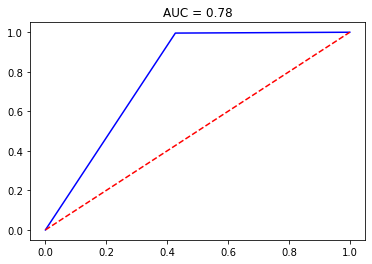

In [133]:
saca_metricas(y_test, y_pred2)

*XGBOOST*

In [134]:
classifier3 = XGBClassifier(n_estimators = 1000).fit(X_train, y_train)
y_pred3    = classifier3.predict(X_test)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


matriz de confusión
[[  860   557]
 [  158 17519]]
accuracy
0.9625536817848539
precision
0.9691856605443683
recall
0.9910618317587826
f1
0.9800016781808519
AUC
0.7989889257594196


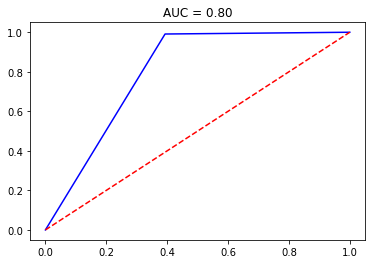

In [135]:
saca_metricas(y_test, y_pred3)

Hemos probado dos modelos de clasficación y, como vemos, tanto el modelo RandomForest como el XGBoost funcionan realmente bien sin feature engineer o grid search. Para las próximas mejoras elegiremos el modelo XGBoost.

-----------------------------------------------------------------

## 6. Feature Engineering

Vamos a intentar mejorar los modelos anteriores con FE. Para ello, observaremos como se distribuyen las distintas variables con la target para generar las mejores transformaciones. Además, crearemos ratios entre ellas.

In [72]:
diciembre['target'] = target

In [73]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)    


C:\Users\carra\anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


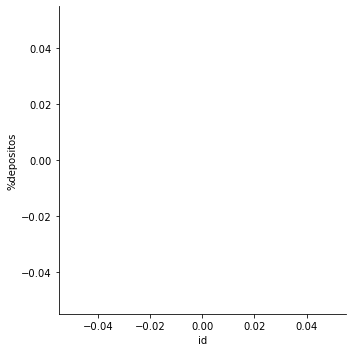

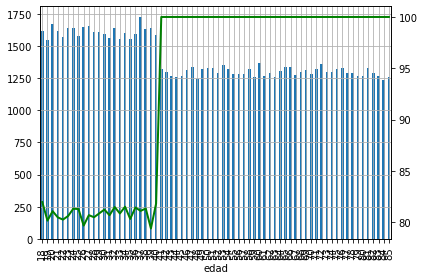

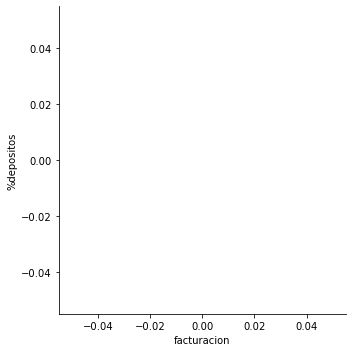

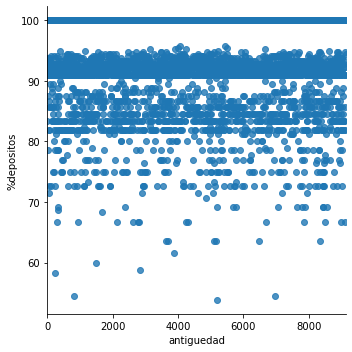

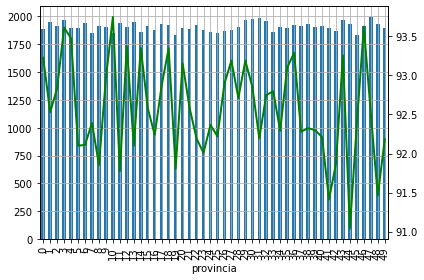

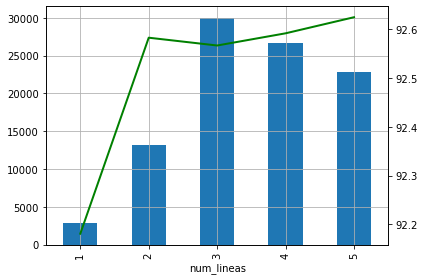

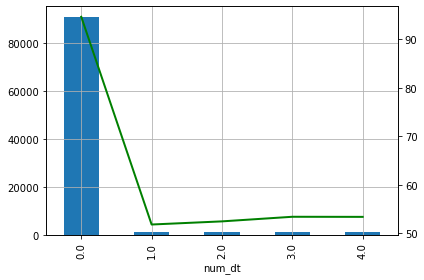

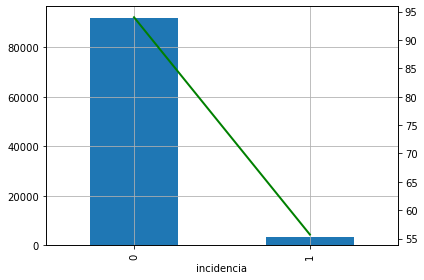

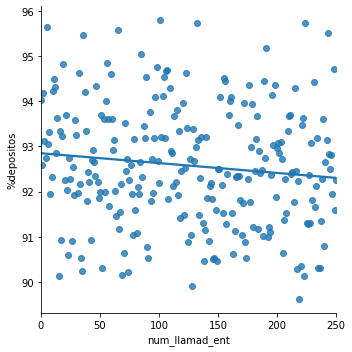

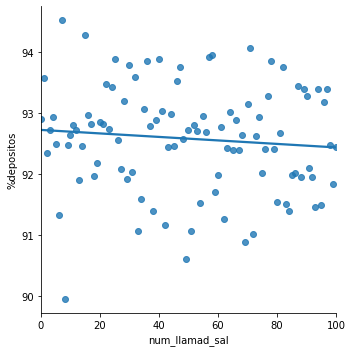

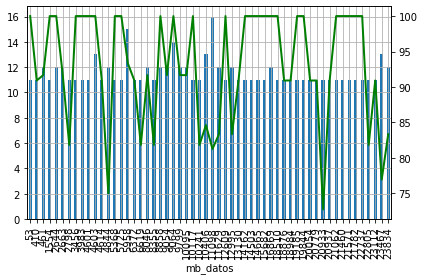

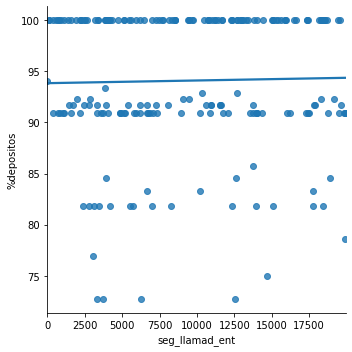

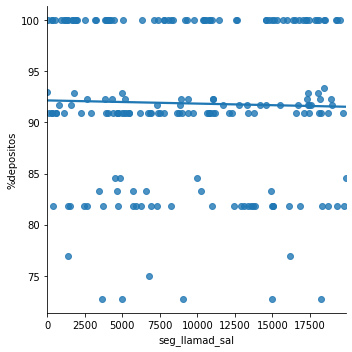

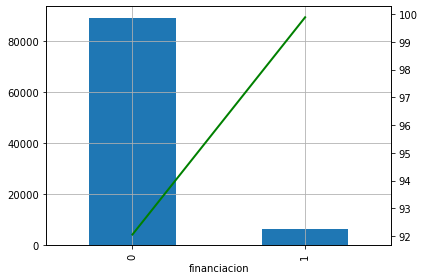

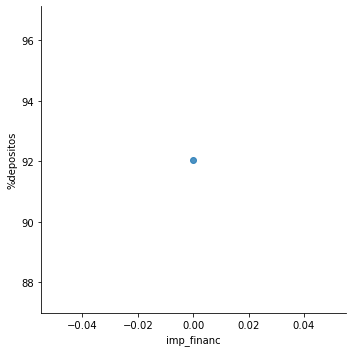

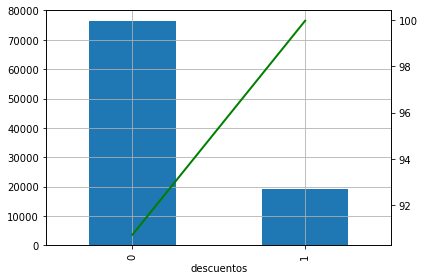

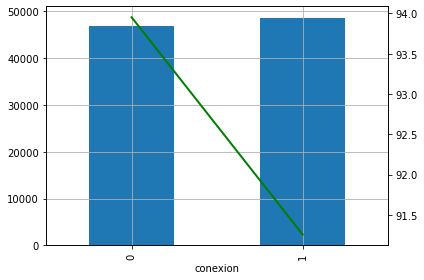

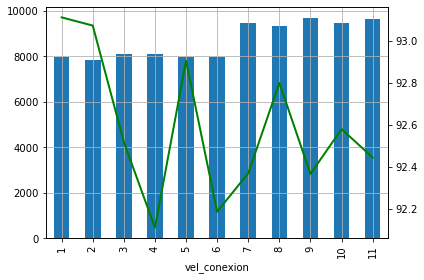

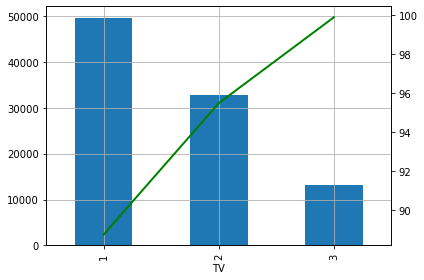

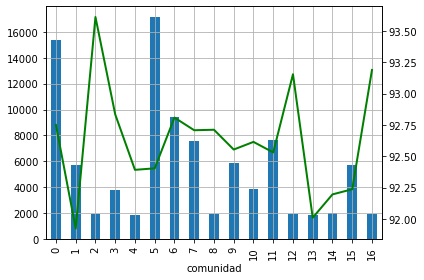

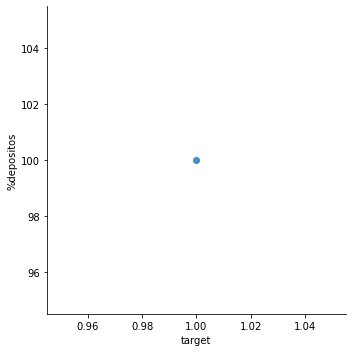

In [74]:
for i in diciembre.columns:
    proporciones_final (i, 'target', diciembre)

**ANÁLISIS**
- Edad: vemos que la target funciona mejor en mayores de 40 años. 
- Antigüedad: crearemos nuevas variables como meses de antigüedad o años de antigüedad.
- Provincia: una nueva variable que recoja los picos.
- Num_lineas: funciona muy bien con 5, podemos crear una binaria de 5 y lo demas o todas menos 1.
- Num_dt: muchos más datos en 0 que en el resto -> binaria.
- Mb_datos por tramos o algo.
- Num_llamad_ent/Num_llamad_sal/Seg_llamad_ent/Seg_llamad_sal/mb_datos: tramos.
- Vel_conexión: la 1 y 2 funcionan muy bien, 5 y 8 más o menos y 4, 6, 9 y 11 muy mal.
- TV: podemos agrupar las categorías 1 y 2 para crear una binaria.
- Comunidad: crearemos una variable que recoja los picos.

In [75]:
def tramos(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,-1,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

In [76]:
## AGE 
diciembre['edad_mayores'] = diciembre['edad'].apply(lambda x: 1 if x>=41 else 0)
tramos('edad','edad_new',5,90,diciembre)

## NUM_DT
diciembre['num_dt_new'] = diciembre['num_dt'].apply(lambda x: 0 if x>=1 else 1)

## NUM_LINEAS
diciembre['num_lineas_new'] = diciembre['num_lineas'] .apply(lambda x: 0 if x==1 else 1) 
diciembre['num_lineas_new2'] = diciembre['num_lineas'] .apply(lambda x: 1 if x==5 else 0) 

## NUM_LLAMAD_ENT
tramos('num_llamad_ent','num_llamad_ent_new',3,300,diciembre)
tramos('num_llamad_ent','num_llamad_ent_new2',50,300,diciembre)

## NUM_LLAMAD_SAL
tramos('num_llamad_sal','num_llamad_sal_new',3,150,diciembre)
tramos('num_llamad_sal','num_llamad_sal_new2',50,150,diciembre)

## ANTIGÜEDAD
tramos('antiguedad','antiguedad_new',3,9500,diciembre) # Tramos
tramos('antiguedad','antiguedad_new2',20,9500,diciembre) # Tramos
diciembre['antiguedad_new3'] = diciembre['antiguedad']//30 # Dividimos por los días de un mes
diciembre['antiguedad_new4'] = diciembre['antiguedad']//365 # Dividimos por los días de un año

## MB_DATOS
tramos('mb_datos','mb_datos_new',10,25500,diciembre) # Tramos
tramos('mb_datos','mb_datos_new2',100,25500,diciembre) # Tramos
tramos('mb_datos','mb_datos_new3',5000,25500,diciembre) # Tramos

## SEG_LLAMAD_ENT
tramos('seg_llamad_ent','seg_llamad_ent_new',10,20500,diciembre) # Tramos
tramos('seg_llamad_ent','seg_llamad_ent_new2',100,20500,diciembre) # Tramos
tramos('seg_llamad_ent','seg_llamad_ent_new3',5000,20500,diciembre) # Tramos

## SEG_LLAMAD_SAL
tramos('seg_llamad_sal','seg_llamad_sal_new',10,20500,diciembre) # Tramos
tramos('seg_llamad_sal','seg_llamad_sal_new2',100,20500,diciembre) # Tramos
tramos('seg_llamad_sal','seg_llamad_sal_new3',5000,20500,diciembre) # Tramos

## TV
diciembre['TV_new'] = diciembre['TV'].apply(lambda x: 1 if x==3 else 0) #Contratado todo o no

## VEL_CONEXION
diciembre['vel_conexion_new'] = diciembre['vel_conexion'].apply(lambda x: 1 if x==1 or x==2 else 0) # Los dos más altos
diciembre['vel_conexion_new2'] = diciembre['vel_conexion'].apply(lambda x: 1 if x==1 or x==2 or x==5 or x==8 else 0) #Contratado todo o no
diciembre['vel_conexion_new3'] = diciembre['vel_conexion'].apply(lambda x: 1 if x==1 or x==2 or x==5 else 0) #Contratado todo o no

## COMUNIDAD
diciembre['comunidad_new'] = diciembre['comunidad'].apply(lambda x: 1 if x==2 or x==12 or x==16 else 0) 
diciembre['comunidad_new2'] = diciembre['comunidad'].apply(lambda x: 1 if x==2 else 0)

## PROVINCIA
diciembre['provincia_new'] = diciembre['provincia'].apply(lambda x: 1 if x==3 or x==4 or x==10 or x==46 else 0) 


In [77]:
# RATIOS
diciembre['seg_total'] = diciembre['seg_llamad_ent'] + diciembre['seg_llamad_sal']
diciembre['llam_total'] = diciembre['num_llamad_ent'] + diciembre['num_llamad_sal']

In [78]:
diciembre['ratio_finanlineas'] = diciembre['imp_financ'] / diciembre['num_lineas'] 
diciembre['ratio_mblineas'] = diciembre['mb_datos'] / diciembre['num_lineas']
diciembre['ratio_factlineas'] = diciembre['facturacion'] / diciembre['num_lineas']
diciembre['ratio_ent'] = diciembre['seg_llamad_ent'] / diciembre['num_llamad_ent']
diciembre['ratio_sal'] = diciembre['seg_llamad_sal'] / diciembre['num_llamad_sal']
diciembre['ratio_dtlineas'] = diciembre['num_dt'] / diciembre['num_lineas']
diciembre['ratio_dtantig'] = diciembre['num_dt']
diciembre['ratio_factmb'] = diciembre['facturacion']
diciembre['ratio_factllamad'] = diciembre['facturacion']
diciembre['ratio_llamantig'] = diciembre['llam_total']
diciembre['ratio_total'] = diciembre['seg_total']

In [79]:
diciembre.ratio_factllamad = diciembre.num_llamad_ent[diciembre.num_llamad_ent == 0]
diciembre.ratio_llamantig = diciembre.antiguedad[diciembre.antiguedad == 0]
diciembre.ratio_factmb = diciembre.mb_datos[diciembre.mb_datos == 0]
diciembre.ratio_dtantig = diciembre.antiguedad[diciembre.antiguedad == 0]
diciembre.ratio_total = diciembre.llam_total[diciembre.llam_total == 0]

In [80]:
diciembre.ratio_factllamad = diciembre.ratio_factllamad.fillna(diciembre.facturacion / diciembre.num_llamad_ent)
diciembre.ratio_llamantig = diciembre.ratio_llamantig.fillna(diciembre.llam_total / diciembre.antiguedad)
diciembre.ratio_dtantig= diciembre.ratio_llamantig.fillna(diciembre.num_dt / diciembre.antiguedad)
diciembre.ratio_factmb = diciembre.ratio_factmb.fillna(diciembre.facturacion / diciembre.mb_datos)
diciembre.ratio_total = diciembre.ratio_total.fillna(diciembre.seg_total / diciembre.llam_total)

In [81]:
diciembre.ratio_ent = diciembre.ratio_ent.fillna(0)
diciembre.ratio_sal= diciembre.ratio_sal.fillna(0)

In [82]:
diciembre =  diciembre.replace(-1, 0)
# No puede haber negativos, asi que a veces al hacer tramos me ha puesto -1 pues lo he replaceado con 0.

-----------------------------------------------------

## 7. Selección de Variables

Una vez finalizado el FE tenemos que seleccionar las variables que incluiremos en nuestro modelo. Miraremos varios criterios como la importancia de los predictores por pureza de nodos y con análisis univariante entre ellas. Solo lo haremos sobre el modelo de XGBoost ya que es el que mejores resultados obtuvo.

Para mirar la importancia de los predictores por pureza de nodos previamente generaremos un modelo con todas las variables creadas.

In [207]:
diciembre = diciembre.drop(['target'], axis = 1)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(diciembre,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = target)

In [209]:
classifier6 = XGBClassifier(n_estimators = 1000).fit(X_train, y_train)
y_pred6    = classifier6.predict(X_test)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


matriz de confusión
[[  864   553]
 [  163 17514]]
accuracy
0.9625013093118258
precision
0.969391708640062
recall
0.9907789783334277
f1
0.9799686660698299
AUC
0.8002589316508353


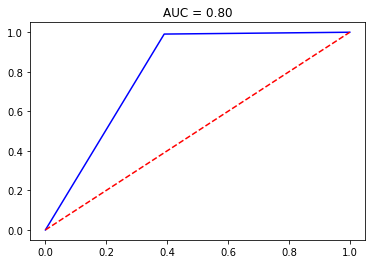

In [210]:
saca_metricas(y_test, y_pred6)

In [211]:
diciembre['target'] = target

In [212]:
importancia_predictores = pd.DataFrame(
                            {'predictor': diciembre.drop(columns = "target").columns,
                             'importancia': classifier6.feature_importances_}
                            )

In [213]:
 importancia_predictores[importancia_predictores.importancia >= 0.0035].sort_values('importancia', ascending=False)

,predictor,importancia
15,descuentos,0.364009
13,financiacion,0.146710
7,incidencia,0.106348
6,num_dt,0.102259
1,edad,0.063686
18,TV,0.057758
16,conexion,0.020767
17,vel_conexion,0.014572
56,ratio_dtlineas,0.013391
51,ratio_finanlineas,0.011270


In [101]:
classifier6.get_booster().get_score(importance_type="gain")

{'edad': 16.60201294715697,
 'num_dt': 25.982730710680947,
 'incidencia': 26.974066672603172,
 'TV': 14.016369819922607,
 'descuentos': 95.14461617514483,
 'id': 2.268455111705779,
 'financiacion': 37.0238527348681,
 'seg_llamad_sal': 0.8293139816110405,
 'num_llamad_sal': 0.88853622435463,
 'conexion': 5.065776604548163,
 'vel_conexion': 4.057830261266786,
 'facturacion': 0.9784560522843786,
 'ratio_dtlineas': 4.0667103106425,
 'ratio_factlineas': 0.9191799110117278,
 'mb_datos': 0.8795141527006453,
 'ratio_factllamad': 0.8605954832978286,
 'ratio_mblineas': 0.9290045774806439,
 'provincia': 0.8109277836850146,
 'seg_llamad_ent': 0.8837551498837642,
 'llam_total': 0.846764663799399,
 'ratio_ent': 0.7495659391047336,
 'ratio_sal': 0.7275785441486755,
 'ratio_dtantig': 0.8810776371768315,
 'seg_total': 0.8427285094710553,
 'provincia_new': 1.3339182248848485,
 'antiguedad': 0.8976798099070911,
 'ratio_total': 0.8704430800417133,
 'num_llamad_ent': 0.8796978981949746,
 'ratio_factmb': 0.

Teniendo en cuenta ambos criterios, seleccionamos las mejores variables:

In [83]:
columnas2 = ['edad',
             'num_dt',
             'incidencia',
             'financiacion',
             'imp_financ',
             'descuentos',
             'conexion',
             'vel_conexion',
             'TV',
             'id',
             'ratio_finanlineas',
             'ratio_dtlineas',
             'provincia_new',
             'facturacion'
                         ]


In [84]:
diciembre2 = diciembre[columnas2]

-------------------------

## 8. Modelo nuevo: XGBoost

In [216]:
# TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(diciembre2,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = target)

In [217]:
#XGBOOST
classifier61 = XGBClassifier(n_estimators = 1000).fit(X_train, y_train)
y_pred61    = classifier61.predict(X_test)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


matriz de confusión
[[  909   508]
 [  212 17465]]
accuracy
0.962291819419713
precision
0.9717353808490513
recall
0.9880070147649488
f1
0.9798036465638148
AUC
0.8147515666626438


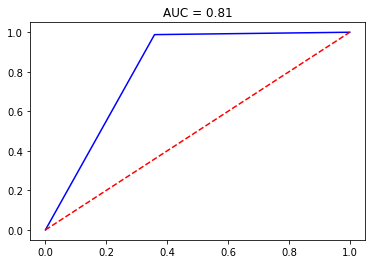

In [218]:
saca_metricas(y_test, y_pred61)

-------------------------------------------------------------------

## 9. Balanceo de datos

Vemos como la variable objetivo está desbalanceada. El 92,58% de los clientes continuan en el mes de enero con la compañía. Por tanto generaremos un modelo con los datos balanceados y elegiremos que modelo es el que mejores resultados obtiene.

In [219]:
target.value_counts()

1    88382
0     7085
Name: id, dtype: int64

In [85]:
print("Before OverSampling, counts of label '1': {}".format(sum(target==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(target==0)))

sm = SMOTE(random_state=2)
diciembre2_res, target_res = sm.fit_resample(diciembre2, target.ravel())


Before OverSampling, counts of label '1': 88382
Before OverSampling, counts of label '0': 7085 



In [86]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(diciembre2_res,
                                                    target_res,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = target_res)

In [87]:

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (141411, 14)
After OverSampling, the shape of train_y: (141411,) 

After OverSampling, counts of label '1': 70706
After OverSampling, counts of label '0': 70705


In [223]:
classifier62 = XGBClassifier(n_estimators = 1000).fit(X_train_res, y_train_res)
y_pred62    = classifier62.predict(X_test_res)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


matriz de confusión
[[17351   326]
 [  826 16850]]
accuracy
0.9674143637032218
precision
0.9810200279459711
recall
0.9532699705815796
f1
0.9669459428440262
AUC
0.9674139636242174


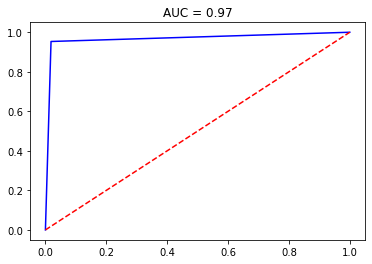

In [224]:
saca_metricas(y_test_res, y_pred62)

In [124]:
final = cross_val_score(estimator=classifier62, X=X_train_res, y=y_train_res, cv=5)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
final

array([0.96644628, 0.96686939, 0.96916767, 0.96824836, 0.96754119])

In [126]:
print(final.mean())

0.9676545757282007


In [128]:
print(final.std())

0.0009727684329063521


Como la media es similar al valor en las 5 cv y la desviación, como vemos, es relativamente pequeña podemos ver que no hay overfitting en los datos y, por tanto, que es el modelo que mejor predice. Para intentar mejorarlo un poco vamos a hacer un grid search tuneando los parámetros.

---------------------------------------------------------------------------------

## 10. Grid Search

In [225]:
classifier62.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 2,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

*Al ser un XGBoost y no tener un ordenador muy potente, se probaron varios modelos con diferentes combinaciones que no se muestran aquí por el exceso de tiempo de ejecución.*

In [226]:
grid_param = {
    #'eta': [ 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [8, 10],
    #'subsample': [ 0.5, 0.8, 1],
    #'colsample_bytree': [0.5, 0.8, 1],
    #'n_estimators': [500,1000]
}

Para evitar el overfitting, dentro del GridSearch metemos cv = 4.

In [227]:
model_grid = GridSearchCV(estimator=classifier62,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=4)

In [228]:
model_grid.fit(X_train_res, y_train_res)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=1000, n_jobs=2,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [229]:
model_grid.best_params_

{'max_depth': 10}

In [230]:
classifier63 = XGBClassifier(n_estimators = 1000, max_depth= 10).fit(X_train_res, y_train_res)
y_pred63    = classifier63.predict(X_test_res)

[20:58:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


matriz de confusión
[[17379   298]
 [  778 16898]]
accuracy
0.9695641105422453
precision
0.9826703884624332
recall
0.9559855170853134
f1
0.9691442991511815
AUC
0.9695637264670782


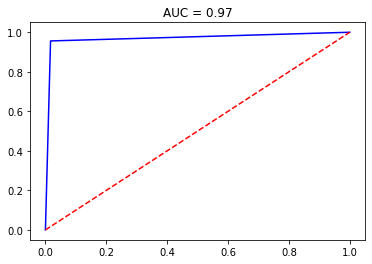

In [231]:
saca_metricas(y_test_res, y_pred63)

Se ha conseguido mejorar ligeramente el modelo.

---------------------------------------------------------

## 11. Predicción

Una vez elegido el modelo, creamos las variables nuevas que habíamos generado con FE y que están incluídas en ese modelo. Obtendremos un modelo con las predicciones sobre el mes de enero con las variables seleccionadas

In [88]:
enero['ratio_dtlineas'] = enero['num_dt'] / enero['num_lineas']
enero['ratio_finanlineas'] = enero['imp_financ'] / enero['num_lineas'] 
enero['provincia_new'] = enero['provincia'].apply(lambda x: 1 if x==3 or x==4 or x==10 or x==46 else 0) 

In [89]:
columnas2 = ['edad',
             'num_dt',
             'incidencia',
             'financiacion',
             'imp_financ',
             'descuentos',
             'conexion',
             'vel_conexion',
             'TV',
             'id',
             'ratio_finanlineas',
             'ratio_dtlineas',
             'provincia_new',
             'facturacion'
                         ]

In [90]:
enero2 = enero[columnas2]

In [91]:
# Estimación para enero
classifier64 = XGBClassifier(n_estimators = 1000, max_depth= 10).fit(diciembre2_res, target_res)
y_pred64    = classifier64.predict(enero2)

C:\Users\carra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
y_pred64

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [93]:
modelo_proba = classifier64.predict_proba(enero2)[:,1]

In [94]:
modelo_proba = (pd.DataFrame(modelo_proba,columns=['probabilidad'],index=enero2.index)) # Le mete al test la columana con las probabilidades
modelo_proba.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [95]:
enero2.reset_index(inplace=True)

In [96]:
modelo_proba.reset_index(inplace=True)

In [97]:
resultado = pd.merge(enero2, modelo_proba, on= ['index'])

In [98]:
resultado.sort_values(by='probabilidad', ascending= False)

,index,edad,num_dt,incidencia,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,id,ratio_finanlineas,ratio_dtlineas,provincia_new,facturacion,probabilidad
0,95467,63,0.0,0,0,0.0,0,0,7,1,1,0.0,0.0,0,216.028109,1.000000
48547,144014,36,0.0,0,0,0.0,0,1,4,3,52367,0.0,0.0,0,386.468584,1.000000
48511,143978,61,0.0,0,0,0.0,1,1,2,3,52329,0.0,0.0,0,340.190769,1.000000
48512,143979,52,0.0,0,0,0.0,0,0,7,3,52330,0.0,0.0,0,393.435993,1.000000
48515,143982,76,0.0,0,0,0.0,0,0,11,3,52333,0.0,0.0,0,309.541963,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41536,137003,28,0.0,0,0,0.0,0,0,7,1,44798,0.0,0.0,0,37.681998,0.000634
82507,177974,32,4.0,0,0,0.0,0,1,3,1,88968,0.0,1.0,0,274.630457,0.000266
774,96241,24,0.0,0,0,0.0,0,1,4,1,842,0.0,0.0,0,233.311908,0.000256
34997,130464,28,4.0,0,0,0.0,0,0,9,1,37713,0.0,4.0,0,23.989383,0.000245


In [100]:
resultado.to_excel('resultado.xlsx', index = False)

-------------------------------------------------------------------------------------------------------------------

## 12. Claves

*Cuanta más elevada la probabilidad, mayor probabilidad de seguir en la compañía.*

- Descuentos: si el cliente no cuenta con descuentos es más probable que se marche de la compañía.
- Incidencia: si el cliente ha tenido alguna incidencia o reclamación es menos probable que se marche de la compañía.
- Financiación: los clientes no tienen financiado algún terminal es más probable que se marche de la compañía. 
- Num_dt: cuantas más líneas impagadas menos probabilidad tiene de irse de la compañía.
- Edad: los jóvenes (menores de 38 años) tienen una mayor probabilidad de dejar la compañía.
- Ratio finan_lineas: cuanto menor importe de financiación medio por número de líneas mayor probabilidad de dejar la compañía.
- Ratio dtlineas: cuanto menor sea, es decir, cuanto menor sea le número de líneas impagadas en relación a las líneas que tenga contratadas el cliente, mayor probabilidad de marcharse de la compañía.
- TV: los clientes que tienen contratado unicamente el fútbol tienen más probabilidad de irse.